<a href="https://colab.research.google.com/github/Jakelinecs/Tareas-Machine-Learning/blob/main/N20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Initial run 1/10 ---
  Iter 1: Center Movement = 3.284808, SSE = 208.2962
  Iter 2: Center Movement = 1.987542, SSE = 62.7215
  Iter 3: Center Movement = 0.329505, SSE = 48.6338
  Iter 4: Center Movement = 0.000000, SSE = 48.6338
  Converged at iteration 4.

--- Initial run 2/10 ---
  Iter 1: Center Movement = 1.696143, SSE = 134.8544
  Iter 2: Center Movement = 0.000000, SSE = 134.8544
  Converged at iteration 2.

--- Initial run 3/10 ---
  Iter 1: Center Movement = 4.978988, SSE = 146.0749
  Iter 2: Center Movement = 0.332080, SSE = 134.4884
  Iter 3: Center Movement = 0.084485, SSE = 134.3818
  Iter 4: Center Movement = 0.000000, SSE = 134.3818
  Converged at iteration 4.

--- Initial run 4/10 ---
  Iter 1: Center Movement = 2.713967, SSE = 49.5620
  Iter 2: Center Movement = 0.109379, SSE = 48.6338
  Iter 3: Center Movement = 0.000000, SSE = 48.6338
  Converged at iteration 3.

--- Initial run 5/10 ---
  Iter 1: Center Movement = 4.995816, SSE = 248.5202
  Iter 2: Center Movem

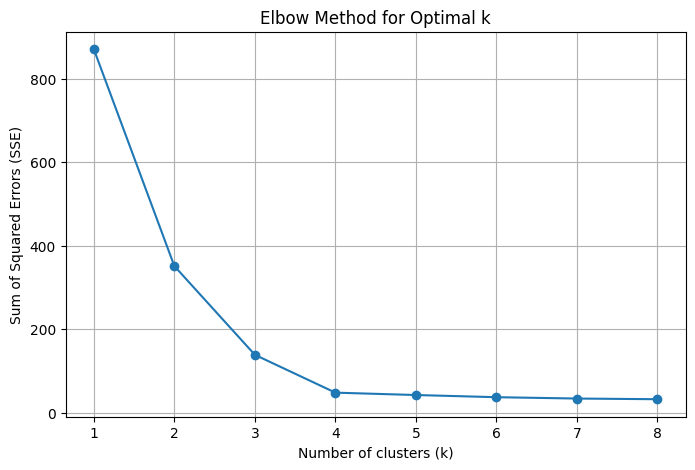

In [17]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.datasets import make_blobs

class ScratchKMeans():

    def __init__(self, n_clusters=8, n_init=10, max_iter=300, tol=1e-4, verbose=False):

        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.cluster_centers_ = None
        self.best_sse = np.inf
        self.labels_ = None

    # P2:
    def _calculate_sse(self, X, centers, labels):
        """
        クラスタ内誤差平方和 (SSE) を計算する。
        """
        sse = 0.0
        for k in range(self.n_clusters):

            X_k = X[labels == k]
            if len(X_k) > 0:

                sse += np.sum(np.sum((X_k - centers[k])**2, axis=1))
        return sse

    # P3:
    def _assign_clusters(self, X, centers):

        labels, distances = pairwise_distances_argmin_min(X, centers)

        return labels, distances

    # P4:
    def _move_centers(self, X, labels):
        """
        中心点 μ_k を、k番目のクラスタに割り当てられたデータ点の平均値（重心）に移動する。
        """
        new_centers = np.zeros((self.n_clusters, X.shape[1]))

        for k in range(self.n_clusters):

            X_k = X[labels == k]

            if len(X_k) > 0:

                new_centers[k] = np.mean(X_k, axis=0)
            else:

                new_centers[k] = self.cluster_centers_[k]

        return new_centers

    # P1, P5, P6:
    def fit(self, X):

        n_samples, n_features = X.shape
        self.best_sse = np.inf

        # P6:
        for i_init in range(self.n_init):

            # P1:

            random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
            centers = X[random_indices]

            if self.verbose:
                print(f"\n--- Initial run {i_init + 1}/{self.n_init} ---")


            for i_iter in range(self.max_iter):
                old_centers = centers.copy()


                labels, _ = self._assign_clusters(X, centers)


                centers = self._move_centers(X, labels)


                center_movement = np.sum(np.linalg.norm(centers - old_centers, axis=1))

                if self.verbose:
                    sse = self._calculate_sse(X, centers, labels)
                    print(f"  Iter {i_iter + 1}: Center Movement = {center_movement:.6f}, SSE = {sse:.4f}")

                if center_movement < self.tol:
                    if self.verbose:
                        print(f"  Converged at iteration {i_iter + 1}.")
                    break

            # P6:
            current_sse = self._calculate_sse(X, centers, labels)

            if current_sse < self.best_sse:
                self.best_sse = current_sse
                self.cluster_centers_ = centers
                self.labels_ = labels

        if self.verbose:
            print(f"\n✅ Training finished. Best SSE: {self.best_sse:.4f}")

    # P7:
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        if self.cluster_centers_ is None:
            raise ValueError("Model must be fitted before predicting.")


        labels, _ = self._assign_clusters(X, self.cluster_centers_)
        return labels


X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
kmeans_scratch = ScratchKMeans(n_clusters=4, n_init=10, max_iter=300, tol=1e-4, verbose=True)
kmeans_scratch.fit(X)

# --- P8:

def plot_elbow_method(X, max_k=10, n_init=10, max_iter=300):
    sse_list = []

    for k in range(1, max_k + 1):
        kmeans = ScratchKMeans(n_clusters=k, n_init=n_init, max_iter=max_iter, tol=1e-4)
        kmeans.fit(X)
        sse_list.append(kmeans.best_sse)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), sse_list, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

import matplotlib.pyplot as plt
print("\n--- P8: エルボー法の実行 ---")
plot_elbow_method(X, max_k=8)

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Wholesale customers data.csv')

data = df.drop(columns=['Region', 'Channel'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

pca = PCA(n_components=None)
pca.fit(X_scaled)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)


pca_2d = PCA(n_components=2, random_state=0)
X_pca = pca_2d.fit_transform(X_scaled)

In [14]:
def plot_elbow_method_sklearn(X, max_k=10):
    from sklearn.cluster import KMeans
    sse_list = []

    for k in range(1, max_k + 1):

        kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=0)
        kmeans.fit(X)

        sse_list.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), sse_list, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for k (Wholesale Data PCA)')
    plt.grid(True)
    plt.show()


In [15]:
from sklearn.cluster import KMeans
kmeans_final = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, random_state=0)
y_pred_pca = kmeans_final.fit_predict(X_pca)

df['KMeans_Cluster'] = y_pred_pca

def plot_clusters(X_pca, labels, title):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(*scatter.legend_elements(), title="Clusters/Groups")
    plt.grid(True)
    plt.show()




In [16]:
df['KMeans_Cluster'] = y_pred_pca


cluster_summary = df.drop(columns=['Region', 'Channel']).groupby('KMeans_Cluster').mean().round(0)




[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


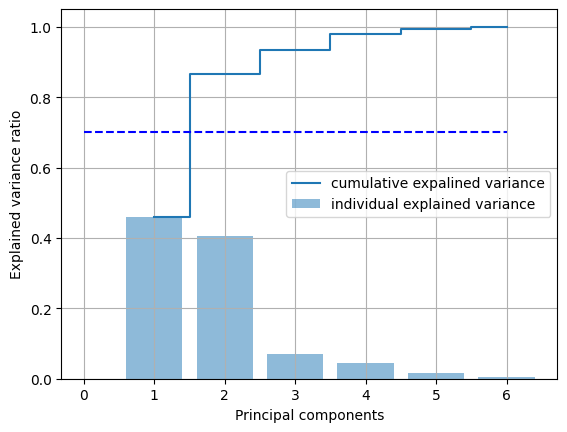

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()